  __K-Nearest Neighbors Algorithm (KNN)__


This method is a kind of supervised machine learning algorithm that used for both classification and regression. The algorithm is a non-parametric method, it means that we do not have the fixed size of parameters. The size of the number of the parameters increases depending on the size of the training data set. The algorithm assumes either data has distribution-free or has a specified distribution but the parameters unspecified.

When the algorithm predicts the class of the new data point, it measures the distance of the new point to all training data points using a different type of distance metric such as Euclidean, Hamming, etc. After measuring distances, it detects the k nearest neighbors and assigns the class most common among these neighbors.

The value of k and the distance function needs to select when implementing the KNN algorithm.

When we want to classify new data point $x$, we draw a sphere centred on $x$. 
Let this sphere have volume $V$ and consisting of $K_k$ points, it refers to the points from class $C_k$. Estimation of density of each classes is defined as follows:

# \begin{equation}
  p(x|C_k)=\frac{K_k}{N_{k}V}
\end{equation}

where  $ \sum_{k}N_k=N$ is the data points of each class denotes by $N_k$ and all data points is $N$.

The unconditional density is denoted by

\begin{equation}
p(x)=\frac{K}{NV}
\end{equation}

The class priors are

\begin{equation}
p(C_k)=\frac{N_k}{N} 
\end{equation}

Then the posterior probability of class using Bayes Theorem

\begin{equation}
p(C_k|x)=\frac{p(x|C_k)p(C_k)}{p(x)}=\frac{K_k}{K} 
\end{equation}

In [12]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#Splitting the data according to variables used to predict the whether customer churned. The last column is response variable Y that refers to 1 if the customer churned and 0 if not.

X = data.iloc[:,3:13].values
Y = data.iloc[:,13].values

In [15]:
# KNN works with numerical variables. We convert to categorical variable 

from sklearn.preprocessing import LabelEncoder

#country
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

#gender
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:,2])

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[1])
X=ohe.fit_transform(X).toarray()
X = X[:,1:]


C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train, y_train)
y_pred = Knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2461  156]
 [ 421  262]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2617
           1       0.63      0.38      0.48       683

   micro avg       0.83      0.83      0.83      3300
   macro avg       0.74      0.66      0.69      3300
weighted avg       0.81      0.83      0.81      3300



In [22]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean error')

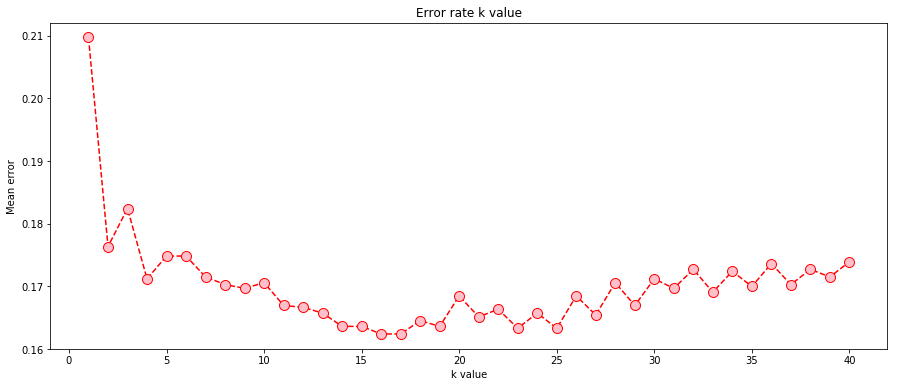

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 41), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
plt.title('Error rate k value')
plt.xlabel('k value')
plt.ylabel('Mean error')

__Convolutional neural network (CNN)__


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import time
start_time=time.time()
classifier = Sequential()
classifier.add(Dense(66, init = 'uniform', activation = 'relu' , input_dim = 11))
classifier.add(Dense(66, init = 'uniform', activation = 'relu'))

classifier.add(Dense(1, init = 'uniform', activation = 'relu'))

classifier.compile(optimizer = 'rmsprop', loss =  'binary_crossentropy' , metrics = ['accuracy'] )

classifier.fit(X_train, y_train, batch_size=100, epochs=20)
    
y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.25)
end_time=time.time()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
from sklearn import metrics
print(cm)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
print("--- %s seconds---" % (time.time()-start_time))

C:\Users\Elif\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(66, activation="relu", input_dim=11, kernel_initializer="uniform")`
  import sys
C:\Users\Elif\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(66, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Elif\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
6700/6700 [==============================] - 1s 140us/step - loss: 3.2573 - acc: 0.7979
Epoch 2/20
6700/6700 [==============================] - 0s 19us/step - loss: 3.2573 - acc: 0.7979
Epoch 3/20
6700/6700 [==============================] - 0s 18us/step - loss: 3.2573 - acc: 0.7979
Epoch 4/20
6700/6700 [==============================] - 0s 20us/step - loss: 3.2573 - acc: 0.7979
Epoch 5/20
6700/6700 [==============================] - 0s 21us/step - loss: 3.2573 - acc: 0.7979
Epoch 6/20
6700/6700 [==============================] - 0s 17us/step - loss: 3.2573 - acc: 0.7979
Epoch 7/20
6700/6700 [==============================] - 0s 17us/step - loss: 3.2573 - acc: 0.7979
Epoch 8/20
6700/6700 [==============================] - 0s 19us/step - loss: 3.2573 - acc: 0.7979
Epoch 9/20
6700/6700 [==============================] - 0s 20us/step - loss: 3.2573 - acc: 0.7979
Epoch 10/20
6700/6700 [==============================] - 0s 19us/step - loss: 3.2573 - acc: 0.7979
Epoch 11/20
6700/6